<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Z-stack-images" data-toc-modified-id="Z-stack-images-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Z-stack images</a></span><ul class="toc-item"><li><span><a href="#Load-image" data-toc-modified-id="Load-image-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load image</a></span></li><li><span><a href="#Plot-GFP-profiles-vs-x" data-toc-modified-id="Plot-GFP-profiles-vs-x-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot GFP profiles vs x</a></span><ul class="toc-item"><li><span><a href="#Average-over-y-over-non-black-pixels" data-toc-modified-id="Average-over-y-over-non-black-pixels-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Average over y over non-black pixels</a></span></li><li><span><a href="#Individual-images-(fix-z)" data-toc-modified-id="Individual-images-(fix-z)-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Individual images (fix z)</a></span></li></ul></li><li><span><a href="#Plot-GFP-profiles-vs-z" data-toc-modified-id="Plot-GFP-profiles-vs-z-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot GFP profiles vs z</a></span></li></ul></li><li><span><a href="#Max-projection" data-toc-modified-id="Max-projection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Max projection</a></span><ul class="toc-item"><li><span><a href="#Roughness" data-toc-modified-id="Roughness-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Roughness</a></span><ul class="toc-item"><li><span><a href="#PhD-course-image" data-toc-modified-id="PhD-course-image-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>PhD course image</a></span></li><li><span><a href="#SD4-images-Johanna" data-toc-modified-id="SD4-images-Johanna-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>SD4 images Johanna</a></span></li><li><span><a href="#Plot-interface" data-toc-modified-id="Plot-interface-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Plot interface</a></span></li><li><span><a href="#Calculate-roughness" data-toc-modified-id="Calculate-roughness-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Calculate roughness</a></span></li><li><span><a href="#Fit-linear-model-on-log-log-data" data-toc-modified-id="Fit-linear-model-on-log-log-data-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Fit linear model on log-log data</a></span></li><li><span><a href="#Calculate-roughness-from-local-width" data-toc-modified-id="Calculate-roughness-from-local-width-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Calculate roughness from local width</a></span></li></ul></li></ul></li></ul></div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg


In [205]:
# Image settings
pix_per_micron = 2.8; # number of pixels per micron
# Lx = 1447/pix_per_micron;
# Ly = 1447/pix_per_micron; 
# Lz = 167.5; # height in microns

# Z-stack images

## Load image

In [7]:
# test image viewers
img = img_all[0]

In [8]:
# view using napari
import napari

# create the viewer and add the coins image
viewer = napari.view_image(img, name='image')

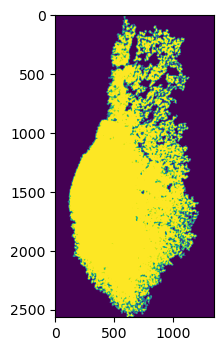

In [10]:
# Using matplotlib imshow
plt.figure(dpi=100)
plt.imshow( img )
plt.show()

## Plot GFP profiles vs x

### Average over y over non-black pixels

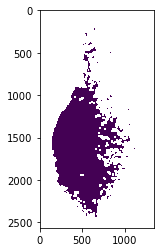

In [17]:
# try for single image
tmp=img_all[0].copy().astype(float)
tmp[tmp==0] = np.ones( np.sum(tmp==0) )*np.nan # set all 0's to NaN

plt.imshow(tmp)

In [20]:
# np.sum( ~np.isnan(tmp) ) 
# np.sum( np.isnan(tmp) ) 

1961944

/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_19014/2795625379.py:2: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(tmp, axis=0)


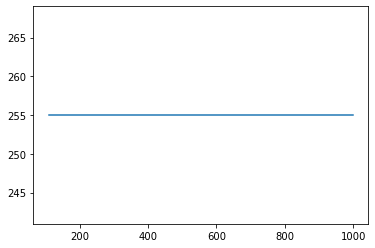

In [22]:
xrange = [0, 1000]
avg = np.nanmean(tmp, axis=0)

plt.plot(avg[xrange[0]:xrange[1]])
#plt.plot(avg)

In [11]:
# Process entire stack
# vals_stack = np.zeros([img.shape[0], img.shape[2]]);

# for i in range(img.shape[0]):
#     tmp=img[i].copy().astype(float)
#     tmp[tmp==0] = np.ones( np.sum(tmp==0) )*np.nan # set all 0's to NaN
#     avg = np.nanmean(tmp, axis=0);
#     vals_stack[i, :] = avg

/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_16899/1571253865.py:7: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(tmp, axis=0);


### Individual images (fix z)

Text(0, 0.5, 'Normalized Osx1-GFP (a.u.)')

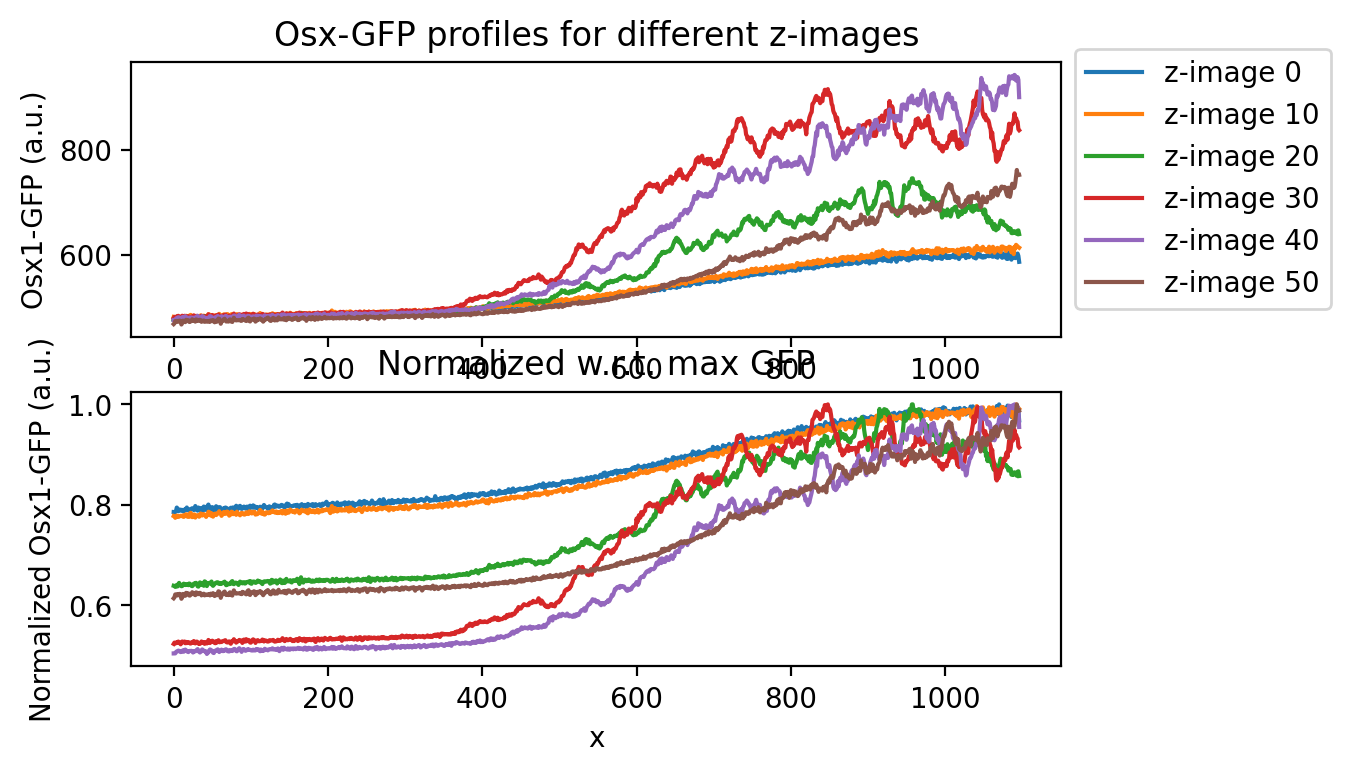

In [79]:
fig_x_profiles = plt.figure(dpi=200);
x_range = np.arange(0, nslices, 10);

plt.subplot(2, 1, 1)
plt.title('Osx-GFP profiles for different z-images')
for i in x_range:
    #plt.plot(intensity_trimmed[i, :], label='z-image '+str(i))
    plt.plot(intensity_trimmed[i, :], label='z-image '+str(i))
plt.xlabel('x')
plt.ylabel('Osx1-GFP (a.u.)')
plt.legend(bbox_to_anchor=(1, 1.1))
    
plt.subplot(2, 1, 2)
plt.title('Normalized w.r.t. max GFP')
for i in x_range:
    plt.plot(intensity_trimmed[i, :]/max(intensity_trimmed[i, :]), label='z-image '+str(i))

plt.xlabel('x')
plt.ylabel('Normalized Osx1-GFP (a.u.)')
#plt.legend(bbox_to_anchor=(1, 1.1))

#plt.tight_layout()

Text(0, 0.5, 'Osx1-GFP (a.u.)')

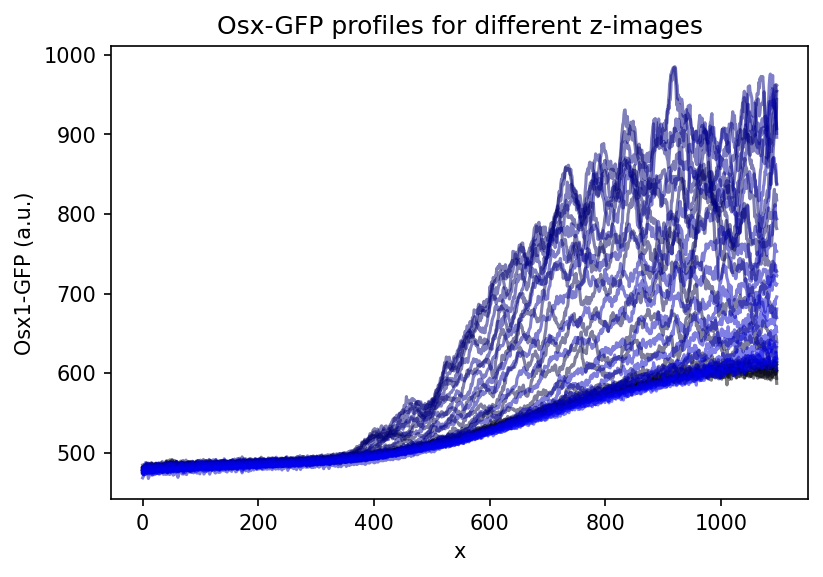

In [109]:
z_range = np.arange(0, nslices, 2);

plt.subplots(dpi=150)
plt.title('Osx-GFP profiles for different z-images')
for i in z_range:
    plt.plot(intensity_trimmed[i, :],  color=[0, 0, i/nslices, 0.5] )
plt.xlabel('x')
plt.ylabel('Osx1-GFP (a.u.)')


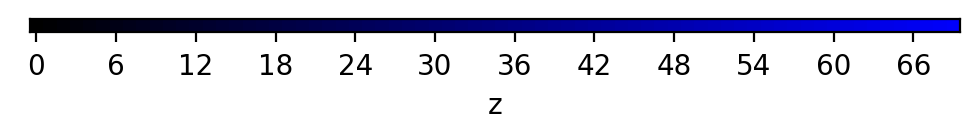

In [113]:
#manually make colorbar
colors_all = np.array([[[0, 0, t/nslices] for t in range(nslices)]]);

plt.figure(dpi=200)
plt.imshow(colors_all)
plt.xlabel('z')
plt.yticks([])
x_ticks = range(0, nslices, 6);
#x_tick_labels = [str(int(t/6)) for t in t_selected];
plt.xticks(ticks=x_ticks) #, labels=x_tick_labels)

# Save colorbar
#plt.savefig( os.path.join(save_folder_figures,'colorbar_green_times.pdf') )

plt.show();

<b>Observation</b>: Front profile and location vary across z. From the second plot, it is visible that there is some variation in profiles even after normalizing by the maximum GFP intensity of each profile.

## Plot GFP profiles vs z

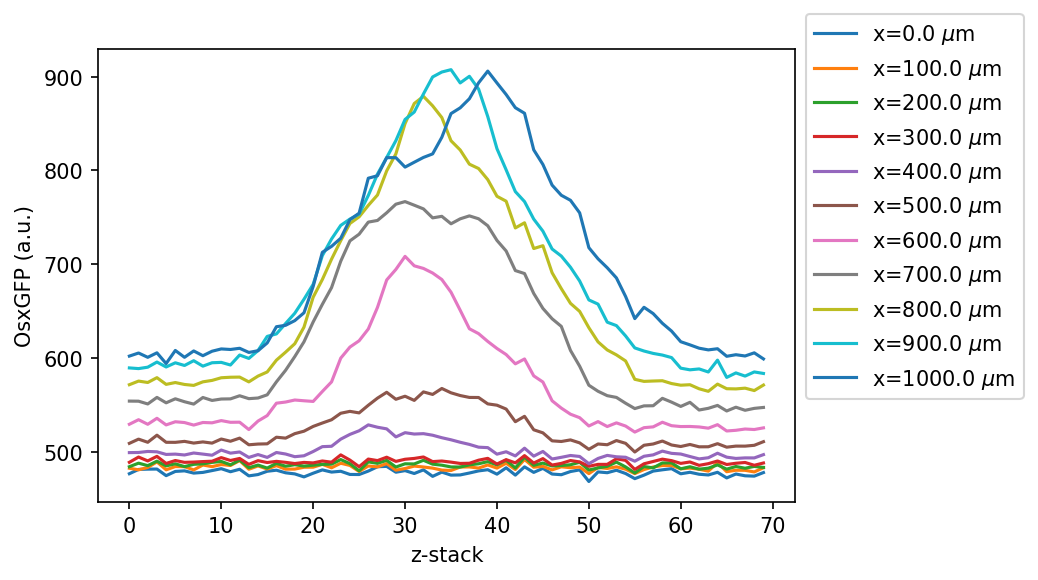

In [86]:
fig_z_profiles = plt.figure(dpi=150);
x_range = np.arange(0, ndatapoints, 100);
for i in x_range:
    plt.plot(intensity_trimmed[:, i], label='x='+str(round(i/pix_per_micron, 1))+' $\mu$m')
plt.xlabel('z-stack')
plt.ylabel('OsxGFP (a.u.)')
plt.legend(bbox_to_anchor=(1, 1.1))

<b>Note</b>:
Maximum GFP intensity across all z-stack images roughly constant with x-positions.

# Max projection

## Roughness

### PhD course image

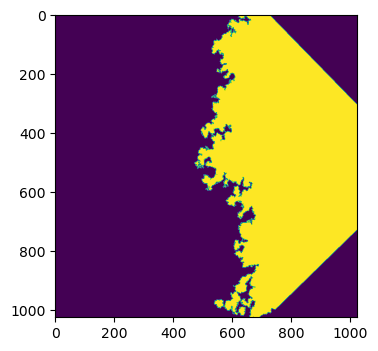

In [352]:
image_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/BAPN_040222/Interface_thresholds/Masked_interface_binary.tif"
data_image=mpimg.imread(image_to_load)[:,:,0]
pix_per_micron = 2.53

# Using matplotlib imshow
plt.figure(dpi=100)
plt.imshow( data_image )
plt.show()

In [353]:
data_image[data_image == 255] = 1; # convert to 0/1    
data_image = pd.DataFrame(data_image)

interface = np.array(data_image.idxmax(axis=1), dtype=float); # find (first) index of max. of data frame

# Check that none of the rows has only 0 or 1:
if len(interface[interface == 0])==0:
    print("No empty/full rows")
else:
    print("Empty/full rows detected!") 
    # post-processing: delete empty/full rows
    mask = np.array(interface == 0, dtype=bool);
    interface[mask] = np.nan; # remove bad rows

No empty/full rows


### SD4 images Johanna

In [213]:
# Load binarized interface images
from skimage import io

folder_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_skull_expansion/series2_SD4/2022_03_03/E14.0_4_roughness/"

file_names = ["MAX_Stitched_2022_03_03_BAPN_OsxCreGFP_DAPI_30x_20220303_#1_L_Huang2_interface_crop2.tif",
             "MAX_Stitched_2022_03_03_BAPN_OsxCreGFP_DAPI_30x_20220303_#1_R_Huang2_interface.tif",
             "MAX_Stitched_2022_03_03_BAPN_OsxCreGFP_DAPI_30x_20220303_#5_L_Huang2_interface.tif"]
pix_per_micron = 2.8 # estimate
#file_names = ["MAX_Stitched_2022_03_03_BAPN_OsxCreGFP_DAPI_30x_20220303_#5_L_Huang2_interface_neg_ctrl.tif"]
#file_names = ["MAX_Stitched_2022_03_03_BAPN_OsxCreGFP_DAPI_30x_20220303_#5_L_Huang2_interface.tif"]

img_all = [];

for i in range(len(file_names)):
    img_all.append( io.imread(folder_load + file_names[i]))

Interface as binary picture

In [301]:
data_image = img_all[2]
data_image[data_image>0] = 1

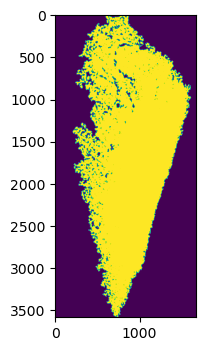

In [302]:
# Using matplotlib imshow
plt.figure(dpi=100)
plt.imshow( data_image )
plt.show()

In [303]:
data_image[data_image == 255] = 1; # convert to 0/1    
data_image = pd.DataFrame(data_image)

interface = np.array(data_image.idxmax(axis=1), dtype=float); # find (first) index of max. of data frame

# Check that none of the rows has only 0 or 1:
if len(interface[interface == 0])==0:
    print("No empty/full rows")
else:
    print("Empty/full rows detected!") 
    # post-processing: delete empty/full rows
    mask = np.array(interface == 0, dtype=bool);
    interface[mask] = np.nan; # remove bad rows

interface = interface - np.mean(interface)

No empty/full rows


### Plot interface

Text(0, 0.5, 'y ($\\mu m$)')

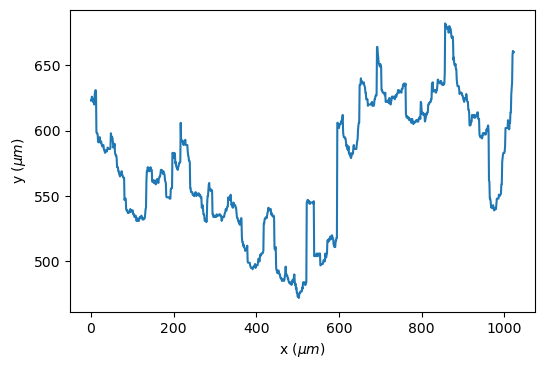

In [354]:
# Plot interface
# settings
Lx = data_image.shape[1]
Ly = data_image.shape[0]
y_vals = np.arange(Ly);
ylims = [5, -20]

h = plt.figure(dpi = 100);
plt.plot(y_vals, interface)
#plt.plot(y_vals[ filt[0]:filt[1] ], interface[ filt[0]:filt[1] ])
plt.xlabel('x ($\mu m$)')
plt.ylabel('y ($\mu m$)')
#plt.xlim(0, Lx/pix_per_micron)
#plt.ylim(0, Ly/pix_per_micron)


In [291]:
filt = [50, 2500]

interface = interface[ filt[0]:filt[1] ]
y_vals = y_vals[ filt[0]:filt[1] ]

### Calculate roughness

 Calculate relevant length scale. 
 
 Relate $k$ to real length scale. For FFT, the decomposition is made up of waves of the form $e^{-i 2\pi k n/N}$. The length scale in the discrete set of values is then $N/k$, the typical distance between two values $L/N$, so the length scale in real space is $L/k$, where $L$ is the total length of the system.
<br>

So let $k_c = L/L_c$ be the critical value of $k$ corresponding to a critical length scale $L_c$ corresponding to the size of a cell.

In [355]:
Lc = 10*pix_per_micron; # cell size in pixels
L = interface.shape[0] # picture size in pixels
kc = L/Lc
print(kc)

40.474308300395265


In [356]:
from numpy import fft
h_all = interface[~np.isnan(interface)]; # filter out nan
S = np.real(fft.fft(h_all)*fft.ifft(h_all)); # h(-k) obtained from inverse FFT

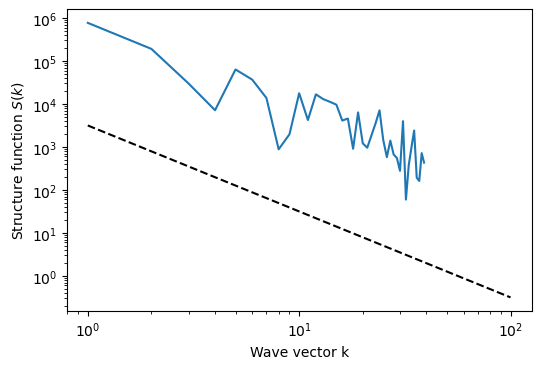

In [357]:
# Plot structure factor
kmin = 1;
kmax = 40;

plt.figure(dpi=100)
plt.plot(np.arange(kmin, kmax), S[kmin:kmax] )  

# Plot power laws 
k_range = 10**np.arange(0, 3);
alpha_plot = 0.5;
exponent = -(2*alpha_plot+1);
c = (10**3.5)
S_range = c*k_range**exponent;
plt.plot(k_range, S_range, 'k--')
#plt.text(10**(1), 10**8, 'slope=' + str( exponent2 ) )
#plt.text(10**(1), 10**(-0.5), 'alpha=' + str( round(-(exponent2+1)/2, 3) ) )

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wave vector k')
plt.ylabel('Structure function $S(k)$')
#plt.legend()

#plt.savefig( os.path.join(save_folder_figures, 'Interface_structure_function_Video_'+str(video_idx+1)+'_alpha_0p5_line.pdf' ) )

plt.show()

In [358]:
# Bin data 
def bin_data(data, binsize):
    # bins the data, adds cells to the last bin to match size and then take avg over each bin
    
    nbins = int(np.ceil(data.shape[0]/binsize));
    value_impute = np.mean( data[ binsize*(nbins-1): ]  ) # fill extra bins with value_impute
    n_add = binsize*(nbins) - data.shape[0]; # number of elements to add 

    if n_add>0:    
        data = np.concatenate((data, value_impute*np.ones(n_add)))

    return list(map(np.mean, data.reshape([nbins, binsize]) ))

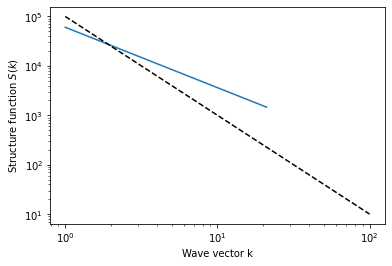

In [359]:
# Plot binned data
#video_idx = 1;
binsize = 20;
        
xdata_plot = (np.arange(kmin/binsize, kmax/binsize)*binsize);
ydata_plot = bin_data( S[kmin:kmax] , binsize )

#plt.plot( this_S_all_t[t, :], color=[0, t/t_max, 0, 0.5] )  
plt.plot(xdata_plot, ydata_plot )  
        
# Plot power laws 
k_range = 10**np.arange(0, 3);
alpha_plot = 0.5;
exponent = -(2*alpha_plot+1);
c = (10**5)
S_range = c*k_range**exponent;
plt.plot(k_range, S_range, 'k--')
# plt.text(10**(1), 10**8, 'slope=' + str( exponent2 ) )
# plt.text(10**(1), 10**(-0.5), 'alpha=' + str( round(-(exponent2+1)/2, 3) ) )

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wave vector k')
plt.ylabel('Structure function $S(k)$')
#plt.legend()

#plt.savefig( os.path.join(save_folder_figures, 'Interface_structure_function_Video_'+
#                          str(video_idx+1)+'_alpha_0p5_binsize_'+str(binsize)+'_line.pdf' ) )

plt.show()

### Fit linear model on log-log data
Not the best method, but works for now

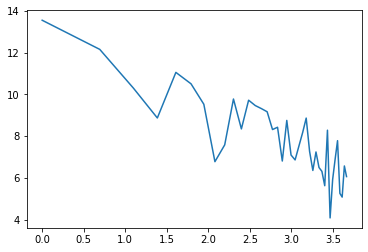

In [360]:
# data_fit
x_data = np.log( np.arange(kmin, kmax) );
y_data = np.log( S[kmin:kmax] );
plt.plot(x_data, y_data )

In [361]:
import statsmodels.api as sm
x_data = sm.add_constant(x_data)
model = sm.OLS(y_data,x_data)
results = model.fit()

roughness = (-results.params[1]-1)/2;
print('Fit parameters:', results.params )
print('Roughness = ', roughness ) # Recalculate alpha from fit 

Fit parameters: [13.22391249 -1.90672721]
Roughness =  0.45336360275825416


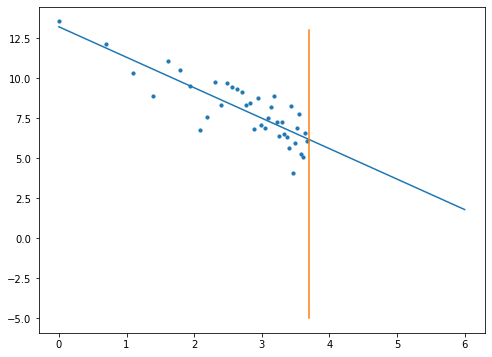

In [362]:
# Plot fit
x_fit = np.arange(0, 7);
y_fit = results.params[0] + results.params[1]*x_fit

plt.figure(figsize=(8, 6));
plt.plot(x_fit, y_fit)
plt.plot(np.log([kc, kc]), [-5, 13])
plt.scatter(x_data[:, 1], y_data, s=10 )
plt.show()

In [107]:
# df = pd.DataFrame([], columns=["alpha"])
# df.loc["MAX_proj"] = roughness

# # tidy data
# # df=(df.stack()
# #  .rename_axis(index = ['t','Video'])
# #  .rename('alpha')
# #  .reset_index()
# #  #.reindex(columns = ['t','Video','alpha']))
# # )
# # # df['hours'] = df['t']/6;
# df

### Calculate roughness from local width